### Table of Contents
#### Introduction
#### 1. Dataset Overview
#### 2. Data Cleaning
#### 3. Feature Engineering
#### 4. Analysis 
  ##### 4.1. Gender-Based Analysis
  ##### 4.2. Test Preparation Analysis
  ##### 4.3. Lunch Type Analysis
  ##### 4.4. Parental Education Level Analysis
  ##### 4.5. Demographic Group Analysis
##### 4.6. Performance Level Distribution
#### 5. Key Findings
#### 6. Limitations
#### 7. Conclusion 


## Introduction

This project is a hands-on learning exercise focused on practicing data manipulation and exploratory analysis using Python and pandas. It works with student performance data to apply core pandas skills such as data cleaning, grouping, aggregation, pivot tables, and basic visualization with matplotlib. The emphasis is on descriptive analysis—exploring patterns and clearly interpreting results—rather than building predictive models, with the goal of strengthening foundational data analysis skills and confidence with real-world datasets.


## 1. Import Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


<hr />
<br />

## 2. Data Loading 

### 2.1 Load and test data

In [2]:
students_df = pd.read_csv('../data/StudentsPerformance.csv')

In [3]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
students_df.shape

(1000, 8)

In [6]:
students_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### 2.2 Null values report 

In [7]:
students_df.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [8]:
students_df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<p>No no values in the data set. :)</p>

### 2.3 Data Cleaning (BASIC) 

#### 2.3.1 Rename Columns 

In [9]:
# Rename columns  

students_df = students_df.rename(columns={
    "race/ethnicity": "demographic_group",
    "test preparation course": "test_prep", 
    "parental level of education":"parental_level_of_education", 
    "math score":"math_score", 
    "reading score":"reading_score",
    "writing score":"writing_score"
})

In [10]:
students_df.columns

Index(['gender', 'demographic_group', 'parental_level_of_education', 'lunch',
       'test_prep', 'math_score', 'reading_score', 'writing_score'],
      dtype='object')

#### 2.3.2 Map Values

In [11]:
# Map values 
students_df["test_prep"] = students_df["test_prep"].map({
    "completed": "Completed",
    "none": "Not Completed"
})

In [12]:
students_df.head()

,gender,demographic_group,parental_level_of_education,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,Not Completed,72,72,74
1,female,group C,some college,standard,Completed,69,90,88
2,female,group B,master's degree,standard,Not Completed,90,95,93
3,male,group A,associate's degree,free/reduced,Not Completed,47,57,44
4,male,group C,some college,standard,Not Completed,76,78,75


<hr />
<br />

## 3. Feature Engineering 

In [13]:
students_df["total_score"] = students_df["math_score"] + students_df["reading_score"] + students_df["writing_score"]
students_df["average_score"] = students_df["total_score"]/3
students_df.head()

,gender,demographic_group,parental_level_of_education,lunch,test_prep,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,Not Completed,72,72,74,218,72.666667
1,female,group C,some college,standard,Completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,Not Completed,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,Not Completed,47,57,44,148,49.333333
4,male,group C,some college,standard,Not Completed,76,78,75,229,76.333333


In [14]:
students_df["performance_level"] = pd.cut(
    students_df["average_score"],
    bins=[0, 60, 75, 100],
    labels=["Low", "Medium", "High"]
)

In [15]:
students_df.head()

,gender,demographic_group,parental_level_of_education,lunch,test_prep,math_score,reading_score,writing_score,total_score,average_score,performance_level
0,female,group B,bachelor's degree,standard,Not Completed,72,72,74,218,72.666667,Medium
1,female,group C,some college,standard,Completed,69,90,88,247,82.333333,High
2,female,group B,master's degree,standard,Not Completed,90,95,93,278,92.666667,High
3,male,group A,associate's degree,free/reduced,Not Completed,47,57,44,148,49.333333,Low
4,male,group C,some college,standard,Not Completed,76,78,75,229,76.333333,High


<hr />
<br />

## 4. Exploratory Data Analysis (EDA)

### 4.1 Overall statistics and analysis 

In [16]:
students_df.describe()

,math_score,reading_score,writing_score,total_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


------
### 4.2 Gender-Based Analysis

#### 4.2.1 proportion 

In [17]:
# 
count_by_gender = students_df.groupby(
    "gender"
)["gender"].count()

count_by_gender

gender
female    518
male      482
Name: gender, dtype: int64

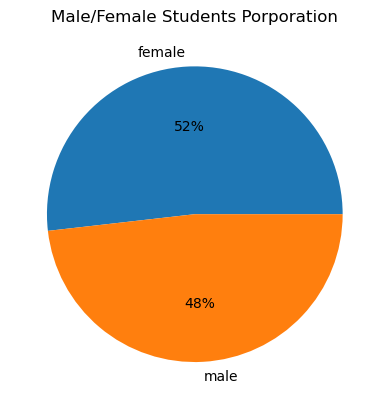

In [18]:
count_by_gender.plot(kind="pie", 
                     title="Male/Female Students Porporation", 
                     ylabel="",
                     autopct='%1.0f%%', 
                    )
plt.show()

This chart show the porportion of male and female students in the dataset. Female students are than male students by 4%.

#### 4.2.2 All Subjects Average Score by Gender

In [19]:
avrage_score_by_gender = students_df.groupby(
    "gender"
)["average_score"].mean()

avrage_score_by_gender

gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64

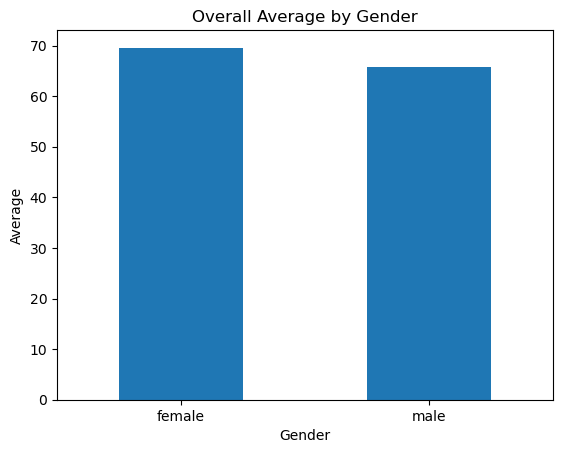

In [20]:
avrage_score_by_gender.plot(kind="bar", 
                            xlabel="Gender", 
                            ylabel="Average", 
                            title="Overall Average by Gender", 
                            rot=0
                           )
plt.show()

#### 4.2.3 Average score analysis by gender per subject

In [21]:
avg_scores = (
    students_df
    .groupby("gender")
    [["math_score", "reading_score", "writing_score"]]
    .mean()
    .T
)

avg_scores

gender,female,male
math_score,63.633205,68.728216
reading_score,72.608108,65.473029
writing_score,72.467181,63.311203


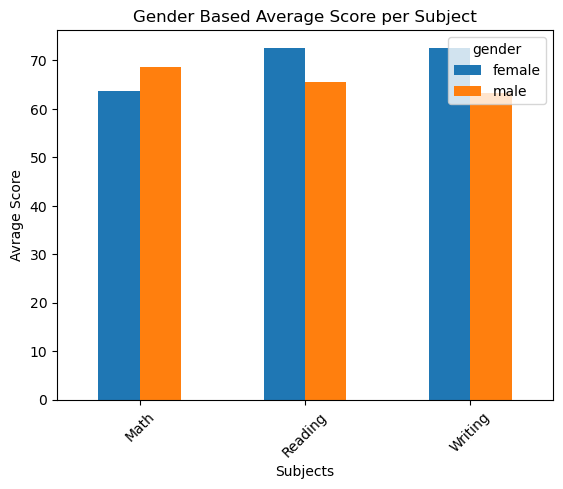

In [22]:

avg_scores = avg_scores.rename(index={
    "math_score": "Math",
    "reading_score": "Reading",
    "writing_score": "Writing"
})

avg_scores.plot(kind="bar", 
                xlabel="Subjects", 
                ylabel="Avrage Score", 
                title="Gender Based Average Score per Subject", 
                rot=45
)

plt.show()

This chart compares the average scores of male and female students across math, reading, and writing subjects. Female students outperform male students in reading and writing on average, while male students outperform female students in math. This suggests that gender-related performance differences are subject-specific rather than uniform across all subjects.

-----
### 4.3 The impact of prep class on exam result 

#### 4.3.1 Prep class complated vs not complated

In [23]:
test_prep = students_df.groupby("test_prep")["test_prep"].count()
test_prep

test_prep
Completed        358
Not Completed    642
Name: test_prep, dtype: int64

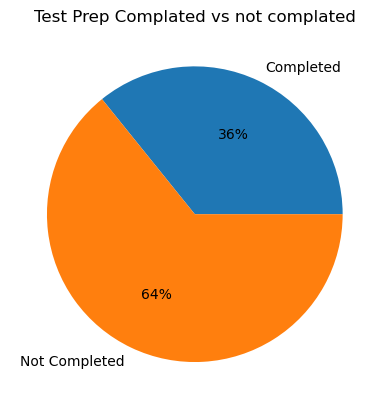

In [24]:
test_prep.plot(kind="pie", 
               title="Test Prep Complated vs not complated", 
               ylabel="", 
               autopct='%1.0f%%'
              )
plt.show()

This chart show the percentage of students who have attended the test prep course or not. It indicates that 2/3 of students have not attended in the coures. 

#### 4.3.2 Test prep by gender

In [25]:
counts = (
    students_df
    .groupby(["test_prep", "gender"])
    .size()
    .unstack()
)
counts

gender,female,male
test_prep,,
Completed,184,174
Not Completed,334,308


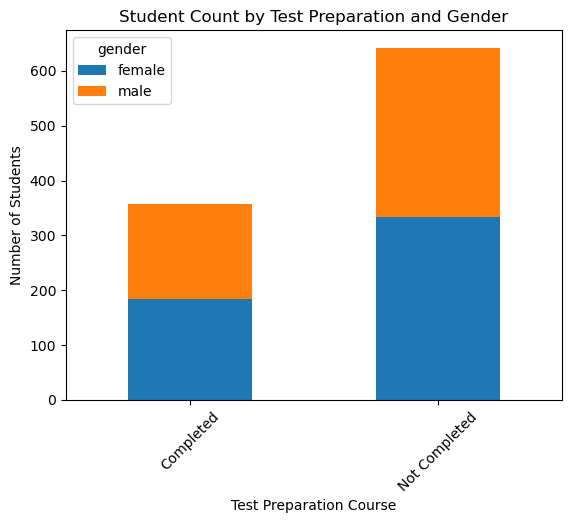

In [26]:
ax = counts.plot(
    kind="bar", 
    title="Student Count by Test Preparation and Gender", 
    rot=45, 
    stacked=True, 
    xlabel="Test Preparation Course", 
    ylabel="Number of Students"
)

plt.show()

The graph indicates that the gender don't have affect if a student attended the prep course or not.

#### 4.3.3 The effect of test prep on exam results 

In [27]:
test_prep_average = students_df.groupby("test_prep")["average_score"].agg("mean")
test_prep_average

test_prep
Completed        72.669460
Not Completed    65.038941
Name: average_score, dtype: float64

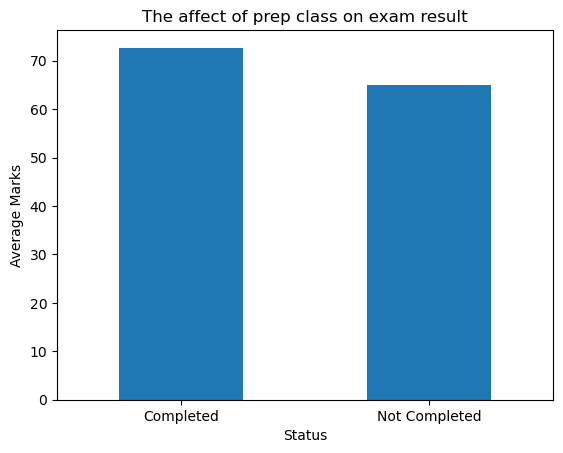

In [28]:
test_prep_average.plot(kind="bar", 
                       xlabel="Status", 
                       ylabel="Average Marks", 
                       title="The affect of prep class on exam result", 
                       rot=0
                      )
plt.show()

Students who completed the test preparation course show higher overall average scores compared to those who did not. This indicates that structured test preparation is associated with improved academic performance.

#### 4.3.4 The affect of test prep on performance level

In [29]:
performance_level_by_course = students_df.groupby(
    ["test_prep", "performance_level"],
    observed=True
)["performance_level"].size().unstack()

performance_level_by_course

performance_level,Low,Medium,High
test_prep,,,
Completed,65,138,155
Not Completed,228,256,158


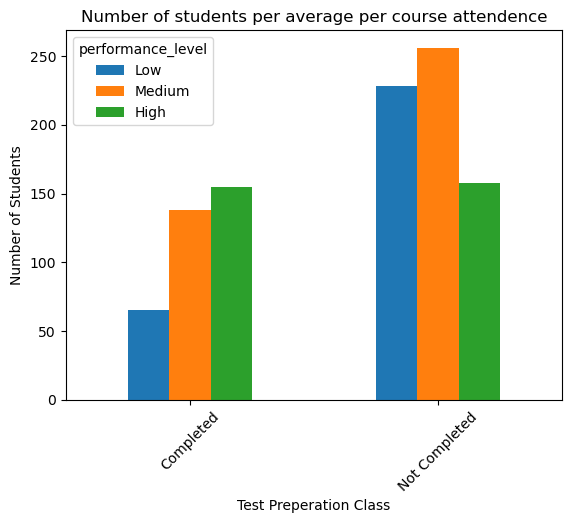

In [30]:
performance_level_by_course.plot(kind="bar", 
                                 rot=45, 
                                 xlabel="Test Preperation Class", 
                                 ylabel="Number of Students", 
                                 title="Number of students per average per course attendence", 
                                )
plt.show()

Students who complated the test preparation course mostly have medium or high performance level while studenets who missed the course are low to medium level. 

------ 
### 4.4 The Impact of lunch type on students performance

#### 4.4.1 Lunch type porportion 

In [31]:
lunch_type = students_df.groupby("lunch")["lunch"].count()
lunch_type

lunch
free/reduced    355
standard        645
Name: lunch, dtype: int64

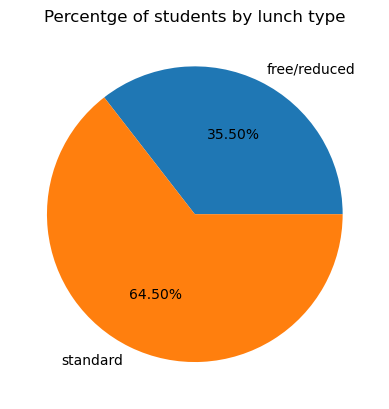

In [32]:
lunch_type.plot(kind="pie", 
                ylabel="", 
                title="Percentge of students by lunch type", 
                autopct="%1.2f%%"
               )
plt.show()

The graph shows around 65% of students have standard lunch. It shows that good amount of the students have a better economical status. 

#### 4.4.2 Lunch Type effect on Student's average score

In [33]:
std_avg_by_lunch = students_df.groupby("lunch")["average_score"].mean()
std_avg_by_lunch

lunch
free/reduced    62.199061
standard        70.837209
Name: average_score, dtype: float64

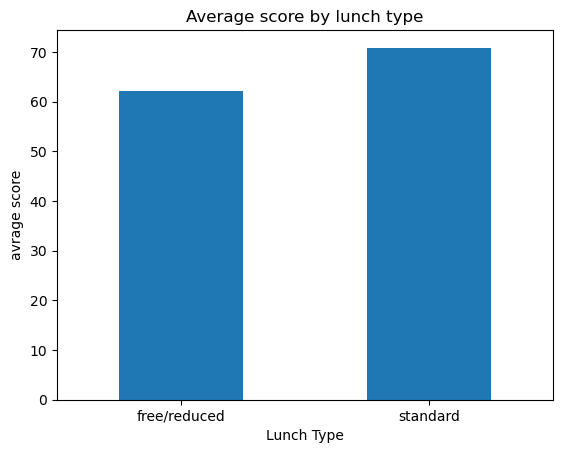

In [34]:
std_avg_by_lunch.plot(kind="bar", 
                      xlabel="Lunch Type", 
                      ylabel="avrage score", 
                      title="Average score by lunch type", 
                      rot=0
                     )
plt.show()

Students receiving standard lunch have higher average scores across all subjects compared to those receiving free or reduced lunch. This pattern suggests that socio-economic factors, as approximated by lunch type, may be associated with academic outcomes. 

-------
### 4.5 Parental Education Level Analysis

#### 4.5.1 Student's Parents Educational Level 

In [35]:
parental_edu = students_df.groupby(
    "parental_level_of_education"
)["parental_level_of_education"].count()

parental_edu

parental_level_of_education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: parental_level_of_education, dtype: int64

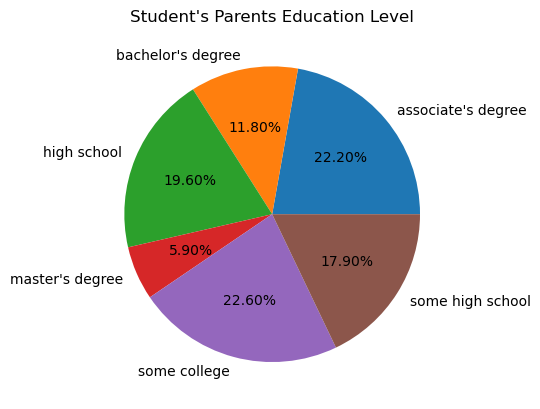

In [36]:
parental_edu.plot(kind="pie", 
                  ylabel="", 
                  title="Student's Parents Education Level", 
                  autopct="%1.2f%%"
                 )
plt.show()

#### 4.5.2 Impact of Parent's Eduction Level on Student's Average 

In [37]:
avg_score_parents_level = students_df.groupby(
    "parental_level_of_education"
)["average_score"]\
.mean().sort_values(ascending=False)

avg_score_parents_level

parental_level_of_education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
some high school      65.108007
high school           63.096939
Name: average_score, dtype: float64

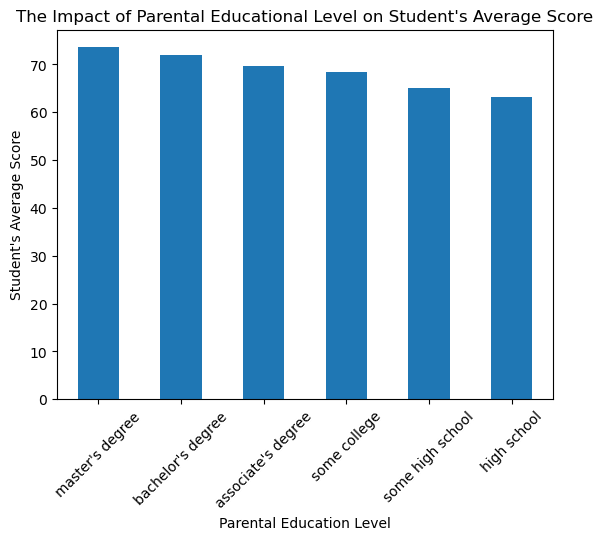

In [38]:
avg_score_parents_level.plot(kind="bar", 
                             xlabel="Parental Education Level", 
                             ylabel="Student's Average Score", 
                             title="The Impact of Parental Educational Level on Student's Average Score", 
                             rot=45
                            )
plt.show()

Average student scores tend to increase with higher levels of parental education. Students whose parents have a bachelor’s degree or higher generally perform better across all subjects. This trend suggests that parental education level may be linked to academic support or learning environment at home.

#### 4.5.3 The impact of parental education level on type of lunch provided to student 


In [39]:
parent_edu_lunch = students_df.groupby(
    ["parental_level_of_education", "lunch"]
)["parental_level_of_education"].size().unstack()

parent_edu_lunch

lunch,free/reduced,standard
parental_level_of_education,,
associate's degree,77,145
bachelor's degree,44,74
high school,70,126
master's degree,24,35
some college,79,147
some high school,61,118


<Axes: xlabel='parental_level_of_education'>

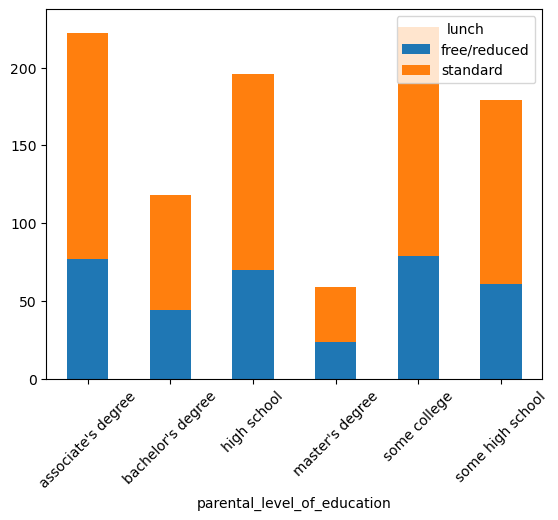

In [40]:
parent_edu_lunch.plot(kind="bar", stacked=True, rot=45)

#### 4.5.4 Correlation among parental education level and prep class attendence

In [41]:
students_df.groupby(
    ["parental_level_of_education", "test_prep"]
)["parental_level_of_education"].size().unstack()

test_prep,Completed,Not Completed
parental_level_of_education,,
associate's degree,82,140
bachelor's degree,46,72
high school,56,140
master's degree,20,39
some college,77,149
some high school,77,102


-----
### 4.6 Demographic Groups Related Analysis 

#### 4.6.1 Groups Proportion

In [42]:
demo_groups = students_df["demographic_group"].value_counts()
demo_groups

demographic_group
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

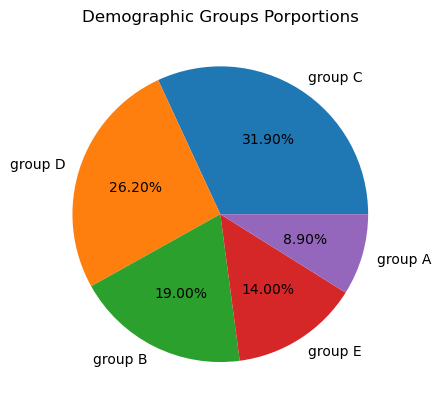

In [43]:
demo_groups.plot(kind="pie", 
                 ylabel="", 
                 title="Demographic Groups Porportions", 
                 autopct="%1.2f%%"
                )
plt.show()

#### 4.6.2 Students Average Score by Demographic Group

In [44]:
std_avg_by_groups = students_df.groupby(
    "demographic_group"
)["average_score"].mean().sort_values(ascending=False)

std_avg_by_groups

demographic_group
group E    72.752381
group D    69.179389
group C    67.131661
group B    65.468421
group A    62.992509
Name: average_score, dtype: float64

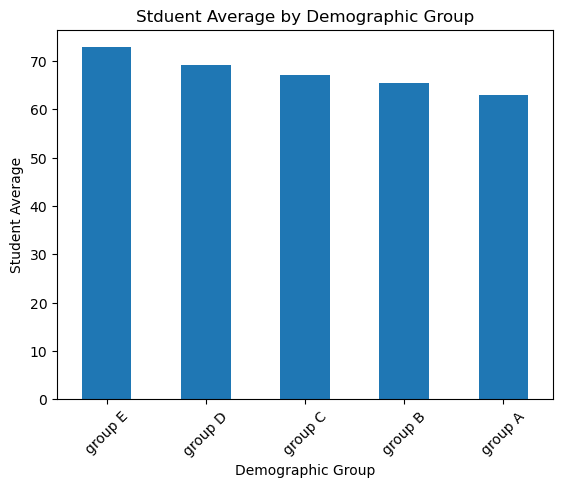

In [45]:
std_avg_by_groups.plot(kind="bar", 
                       xlabel="Demographic Group", 
                       ylabel="Student Average", 
                       title="Stduent Average by Demographic Group",
                       rot=45
                      )

plt.show()

#### 4.6.2 Subject Based Average by Demographic Group 

In [46]:
subjects_mean_by_demogroup = students_df.groupby(
    "demographic_group"
)[["math_score","reading_score", "writing_score"]].mean().T

subjects_mean_by_demogroup

demographic_group,group A,group B,group C,group D,group E
math_score,61.629213,63.452632,64.463950,67.362595,73.821429
reading_score,64.674157,67.352632,69.103448,70.030534,73.028571
writing_score,62.674157,65.600000,67.827586,70.145038,71.407143


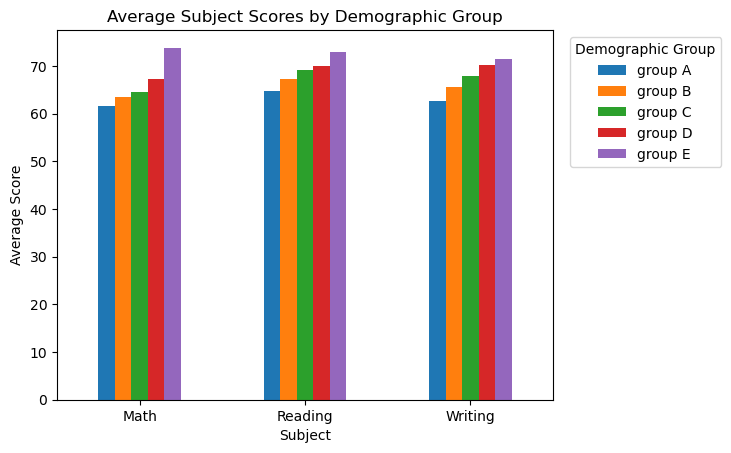

In [47]:
ax = subjects_mean_by_demogroup.plot(kind="bar")

ax.set_xlabel("Subject")
ax.set_ylabel("Average Score")
ax.set_title("Average Subject Scores by Demographic Group")
ax.set_xticklabels(
    ["Math", "Reading", "Writing"],
    rotation=0
)
ax.legend(
    title="Demographic Group",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)
plt.show()



<hr />
<br />

## 5. Key Findings 

- Female students score higher than male students in reading and writing, while male students score higher in math.
- Students who completed the test preparation course have higher average scores in all subjects.
- Students with standard lunch generally perform better than students with free or reduced lunch.
- Higher parental education levels are associated with higher average student scores.
- Performance differences exist across demographic groups, with group E consistently performs best in all subjects.
- Most students fall into the medium performance category, with fewer students in low and high performance groups.

---------
## 6. Limitations

- The dataset is relatively small and may not represent all student populations.
- Demographic groups are anonymized and do not reflect real ethnic or cultural identities.
- The analysis is descriptive and does not include statistical testing.
- Relationships observed in the data show associations, not causal effects.
- Other important factors such as school quality, teaching methods, and family income are not included.


------
## 7. Conclusion

This project explored student performance across different demographic and socio-economic factors using pandas and data visualization. The analysis shows clear patterns related to gender, test preparation, lunch type, and parental education level. While the results provide useful insights, further analysis with more data and statistical methods would be needed to draw stronger conclusions.
